# Práctica 3.1: Regresión lineal

<center><h3>
    Pedro López-Chaves Pérez
</h3></center>

## Instrucións

Isto é un **Jupyter Notebook**, un documento que integra código Python nun arquivo Markdown.
Isto permítenos, ir exexutando celdas de código pouco a pouco, así como xerar automáticamente un informe ben formateado da práctica.

Podes engadir unha celda co botón **"Insert"** da barra de ferramentas, e cambiar seu tipo con **"Cell > Cell Type"**

Para executar unha celda de código, seleccionarémola e pulsaremos a botón **"▶ Run"** da barra de ferramentas.
Para pasar o documento a HTML, seleccionaremos **"File > Download as > HTML (.html)"**

Segue este guión ata o final. Executa o código proporcionado paso a paso comprendendo o que estás a facer e reflexionando sobre os resultados. Haberá preguntas intercaladas ao longo do guión, responde a todas elas na sección reservada para ese fin: **"Respostas ao cuestionario"**. Por favor, non modifiques ningunha liña de código agás cando se che pida explícitamente.

Non esquezas insertar o teu **nome e apelidos** na celda superior.

## Entrega da práctica

A data límite de entrega será a indicada no Campus Virtual. A entrega consistirá nun único arquivo comprimido co nome `APELIDOS_NOME_RegresionLineal.zip` que conteña os seguintes ficheiros:

 * `APELIDOS_NOME_RegresionLineal.html`: Arquivo HTML froito da exportación do presente Notebook, coas preguntas respondidas ao final do documento.
 * `APELIDOS_NOME_RegresionLineal.ipynb`: Arquivo Jupyter Notebook fonte.
 * Arquivo de datos do problema de libre elección.

## Números aleatorios

<span style="color:red">**MOI IMPORTANTE:**</span> Vamos a establecer un *seed* cun valor predefinido inmediatamente antes de executar calquera operación cun compoñente aleatorio. Así nos aseguraremos de que os nosos resultados sexan repetibles.

Isto é, imos poñer `np.random.seed(SEED_VALUE)` antes de:
 - `train_test_split()`
 - `fit()`
 - `predict()`
 
Tamén imos poñer `random_state=SEED_VALUE` en aquelas funcións que o admitan (coma `train_test_split`).

Haberá ocasión nas que isto sexa excesivo, pero así curámonos en despistes.

# Estimación do prezo das vivendas

Neste exercicio imos asentar os conceptos vistos nas clases teóricas relativos á técnica de regresión lineal a través dun problema sinxelo. Supoñamos que somos unha inmobiliaria e queremos desenvolver unha ferramenta que nos axude a estimar un prezo recomendado de venda dos nosos inmobles. Dispomos dun pequeno dataset, `vivendas.csv`, que recolle datos de 73 vivendas vendidas pola empresa nos dous últimos anos. Neste conxunto de datos temos rexistrada a superficie total do inmoble en metros cadrados, xunto co prezo de venda en miles de euros. O noso obxectivo final é sermos capaces de, para cada novo inmoble á venda, obter un prezo recomendado de venda en base aos metros cadrados dos que dispón.

## Carga de datos e comprensión dos mesmos

Comezaremos por cargar en Python o noso conxunto de datos. O primeiro que debemos facer é asegurarnos de ter o arquivo de datos no mesmo directorio que este guión de prácticas. 

Para a carga dos datos empregamos a función `read_csv()` indicando o nome do arquivo CSV. Tamén detallamos que a primeira liña do arquivo contén os nomes das columnas (`header = 0`) e que os datos están separados por comas (`delimiter = ','`). Executa o seguinte script premendo no botón **"▶ Run"** da barra de ferramentas:

In [1]:
import pandas as pd  # Importamos a librería (isto sólo é necesario facelo unha vez)

vivendas = pd.read_csv('vivendas.csv',  # Cargamos o csv
                       delimiter=',',
                       header=0)

O dataset xa se atopa dispoñible no entorno Python. Agora poderémolo referenciar por medio do obxecto `vivendas`, do tipo `DataFrame`. Os dataframes son unha clase de obxectos especial en Python, usados como a estrutura de datos fundamental pola maioría do software de construción de modelos deste entorno. Un dataframe almacea unha táboa de datos na que cada fila corresponde a unha instancia (no noso caso vivendas) e cada columna a unha variable (superficie e prezo).

Unha boa práctica antes de comezar a construir un modelo de regresión é analizar e comprender os datos cos que imos a traballar. O primeiro que faremos, porén, será obter unha breve descripción dos mesmos:

* Número de instancias.
* Número de variables.
* Tipo de cada variable.
* Distribución de valores por cada variable.
* Correlación entre variables.

A función `.info()` do obxecto `DataFrame` danos unha primeira descrición dos datos bastante completa:

In [2]:
vivendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   superficie  73 non-null     int64  
 1   prezo       73 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.3 KB


Vemos unha descrición por columnas, indicándonos o tipo de dato de cada columna e cantos valores hai para cada unha delas. Hai outras alternativas á función anterior. Por exemplo, `.head()` tamén nos mostra as primeiras *n* instancias do noso conxunto de datos:

In [68]:
vivendas.head(n=5)

,superficie,prezo
0,81,191.73
1,117,286.90
2,99,248.93
3,85,143.29
4,116,249.61


Con `.shape` coñecemos directamente o número de filas e columnas do dataset: 

In [69]:
vivendas.shape

(73, 2)

In [70]:
print('Filas: {}'.format(vivendas.shape[0]))
print('Columnas: {}'.format(vivendas.shape[1]))

Filas: 73
Columnas: 2


Un consello útil para o futuro: cando teñas dúbidas sobre que fai ou que argumentos toma unha función, non dubides en consultar a axuda de Python con `help()`. Por exemplo:

In [3]:
help(vivendas.head)

Help on method head in module pandas.core.generic:

head(n: 'int' = 5) -> 'FrameOrSeries' method of pandas.core.frame.DataFrame instance
    Return the first `n` rows.
    
    This function returns the first `n` rows for the object based
    on position. It is useful for quickly testing if your object
    has the right type of data in it.
    
    For negative values of `n`, this function returns all rows except
    the last `n` rows, equivalent to ``df[:-n]``.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    same type as caller
        The first `n` rows of the caller object.
    
    See Also
    --------
    DataFrame.tail: Returns the last `n` rows.
    
    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    0  alligator
    1        bee
    2     falcon

> ❓ **_Pregunta 1._**  Indica o número de instancias e variables do dataset e o seu tipo. Investiga como acceder a valores de filas e columnas concretas dun obxecto dataframe e averigua cal foi o prezo de venda da vivenda na posición 50 do dataset. Indica o comando que empregaches para averigualo.

**RESPUESTA**

Hay 73 filas de 2 columnas. En cada fila se almacena primeramente la superficie (integer) y posteriormente el precio (float). La manera que encontramos es vivendas.iloc[n], donde n es la posición de la que deseamos conocer lps valores. En este caso como queremos la poscion 50 ejecutamos: vivendas.iloc[50] y obtenemos la siguiente salida:

superficie    270.00

prezo         376.51

Name: 50, dtype: float64


In [4]:
vivendas.iloc[50]

superficie    270.00
prezo         376.51
Name: 50, dtype: float64

Tamén podemos analizar a distribución dos datos coa función `.describe()`:

In [5]:
vivendas.describe()

,superficie,prezo
count,73.000000,73.000000
mean,127.534247,162.652192
std,52.721512,108.200288
min,75.000000,51.250000
25%,91.000000,89.520000
50%,109.000000,119.730000
75%,138.000000,191.730000
max,281.000000,507.090000


> ❓ **_Pregunta 2._**  Cal é o prezo medio de venda dos inmobles? Que indican e significan *25%.*, *50%.* e *75%.* na saída da función anterior? Baseándote nos valores anteriores, cal é a mediana de superficie e a de precio?

**RESPUESTA**

El precio medio de la venta de los inmuebles es de 162.652192.

Los 25%, 50% e 75% son el primer cuartil, la mediana y el tercer cuartil.

La mediana del precio es 119.730000 y la de la superficie es 109.000000.

Coa función `.plot()` podemos debuxar rapidamente un *scatter plot*, ou gráfico de dispersión, dos nosos datos:

<AxesSubplot:xlabel='superficie', ylabel='prezo'>

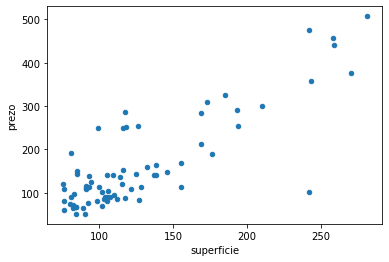

In [6]:
vivendas.plot(kind='scatter', x='superficie', y='prezo')

> ❓ **_Pregunta 3._**  Observa detidamente o gráfico anterior. Xa que se trata dun gráfico de dispersión, que poderías comentar sobre a dispersión dos datos? Dirías que existe algún tipo de relación entre as dúas variables? Xustifica a túa resposta.

**RESPUESTA**

En general los puntos están bastante concentrados y dibuja una corriente ascendente. Aunque hay valores que se salen de este orden (valores atípicos), los demás puntos si que siguen un orden claro y ascendente. Esto nos permite intuir que a mayor superficie, mayor es el precio en la mayoría de los casos.

Os gráficos de dispersión axúdannos a visualizar relacións lineais entre a variable a predicir e as variables preditoras. Neste caso queremos predicir o prezo do inmoble e a única variable preditora da que dispomos é a súa superficie pero, se dispuxésemos de varias variables preditoras, deberiamos debuxar un gráfico de dispersión para cada unha delas ou un gráfico en 3 dimensións no caso de que sexan 2 variables preditoras.

Para representacións deste tipo, é conveniente empregar a librería `matplotlib`.

In [2]:
# Indicámoslle ao Notebook que queremos figuras interactivas (isto sólo é necesario facelo unha vez)
# Isto é interesante para representacións en 3D
%matplotlib notebook

import matplotlib.pyplot as plt  # Importamos a libraría (isto sólo é necesario facelo unha vez)
import numpy as np  # Importamos NumPy, para operacións matemáticas

x  = [0.         0.04081633 0.08163265 0.12244898 0.16326531]...
y1 = [1.         0.96729486 0.8713187  0.71834935 0.51839257]...
y2 = [-1.         -0.99179001 -0.96729486 -0.92691676 -0.8713187 ]...


<IPython.core.display.Javascript object>


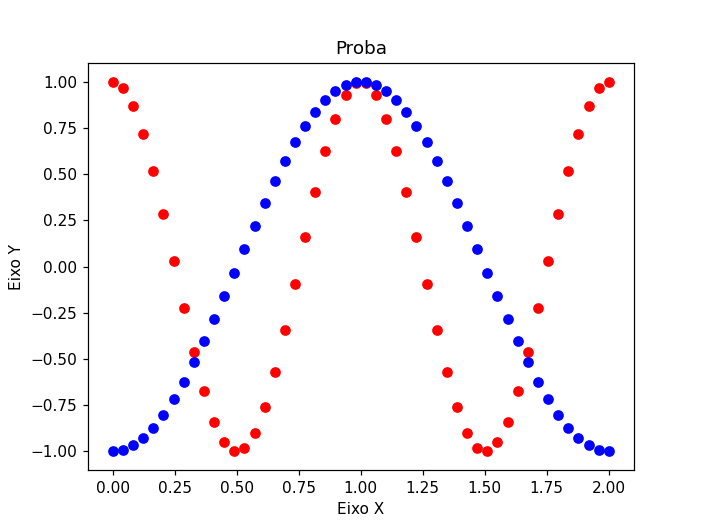

In [3]:
# Simulamos uns datos
x = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x)
y2 = np.cos(np.pi + np.pi * x)

print('x  = {}...'.format(x[:5]))
print('y1 = {}...'.format(y1[:5]))
print('y2 = {}...'.format(y2[:5]))


# Debuxamos os datos
fig = plt.figure()  # Creamos unha figura (contenedor para elementos a debuxar)
ax = fig.add_subplot(111, projection='rectilinear')  # Engadimos un Axes á figura (contén os elementos do debuxo)

ax.scatter(x, y1, color="red")  # Engadimos un scatterplot vermello
ax.scatter(x, y2, color="blue")  # Engadimos un scatterplot azul

ax.set_title("Proba")  # Poñemos un título

plt.xlabel("Eixo X")  # Nombramos os eixos
plt.ylabel("Eixo Y")

plt.show()  # Mostramos a figura por pantalla

Analizando o gráfico de dispersión das vivendas xa nos puidemos facer unha idea da dependencia entre as dúas variables. Outro xeito de analizar esta dependencia é estudando a súa correlación. A correlación é unha medida estatística que amosa o grao de dependencia lineal entre dúas variables. Esta medida pode tomar valores no rango [-1, +1]:

* Se o valor dunha das variables medra de xeito constante conforme aumenta o valor da outra, entón dicimos que teñen unha forte correlación positiva (valores próximos a +1).
* Se o valor dunha das variables diminúe de xeito constante cando o valor da outra aumenta, entón teñen unha forte correlación negativa (valores próximos a -1).
* Se as dúas variables están pouco relacionadas entón obtemos valores próximos a 0.

En Python podemos obter o coeficiente de correlación empregando a función `.corr()` dunha columna do dataframe sobre a outra columna:

In [9]:
vivendas['superficie'].corr(vivendas['prezo'])

0.8337718450638245

Observa como accedemos a cada unha das columnas do dataframe. 

Se traballásemos con máis de 2 variables resultaría máis doado invocar a función `.corr()` directamente sobre o dataframe, para obter unha matriz de correlacións entre cada par de variables:

In [10]:
vivendas.corr()

,superficie,prezo
superficie,1.000000,0.833772
prezo,0.833772,1.000000


## Construción dun modelo de regresión a baixo nivel

Imos construir un regresor lineal empregando o método de descenso do gradiente que xa vimos nas clases expositivas. Neste caso imos empregar as dúas variables das que dispomos directamente, pero ten en conta que habitualmente antes de adestrar un modelo realízase unha etapa de preprocesado na que, entre outras cousas, seleccionamos as instancias e as variables que queremos empregar na aprendizaxe. 

Queremos obter unha función lineal $h_\theta (x)$ (unha recta) que, a partir dos valores de superficie das vivendas, $x$, nos prediga o seu prezo máis axeitado, $y$:
  $$ y = h_\theta (x) = \theta_0 + \theta_1 x, $$
onde $\theta_0$ e $\theta_1$ son os 2 parámetros que definen a recta.

Definimos a función $h_\theta (x)$ en Python:

In [11]:
### Función de regresión lineal h ###
def h(x, th0, th1):
    return (th0 + x * th1)

Con esta función $h_\theta (x)$, se conñecésemos os valores óptimos dos dous parámetros $\theta_0$ e $\theta_1$ da recta, seriamos capaces de predecir un prezo aproximado ($y$) en base a unha superficie dada ($x$). Por exemplo, imaxina que  $\theta_0 = 0.5$ e $\theta_1 = 3$ son os valores óptimos da recta. Se temos unha vivenda de 242 metros cadrados (vivenda 24 no dataset), podemos estimar o seu prezo así:

In [12]:
h(x=242, th0=0.5, th1=3)

726.5

O prezo estimado para unha vivenda de 242 metros cadrados sería de 726500 euros. Sen embargo, o prezo real desta vivenda é:

In [13]:
vivendas.iloc[23]

superficie    242.0
prezo         475.4
Name: 23, dtype: float64

A estimación supera en 251100 euros o prezo real do inmoble.

O problema é por tanto que non coñecemos cales son os valores reais dos parámetros, necesitamos aprendelos. Para iso, definimos unha función de custo $J(\theta_0, \theta_1)$ que guíe ao algoritmo de aprendizaxe no axuste de $\theta_0$ e $\theta_1$. Empregamos o erro cadrático medio:

In [14]:
### Erro cadrático medio ###
def ecm(reais, predicion):
    m = len(reais)  # tamaño do conxunto de datos
    erro = sum((predicion - reais)**2) / (2*m)
    return erro

### Función de custo J ###
def j(x, y, th0, th1):
    pred = h(x, th0, th1)  # predición realizada co noso regresor lineal h
    erro = ecm (y, pred)
    return erro

Por último, creamos unha función que implemente o descenso do gradiente, método que nos permitirá axustar a recta que mellor aproxima a nube de puntos:

In [15]:
### Implementación do método do descenso do gradiente ###
def desc_grad(x, y, alpha=0.00001, iteracions=35):
    # Inicializamos os coeficientes a 0
    theta0 = 0
    theta1 = 0
    hist_custos = []
    
    for i in range(iteracions):
        # Calculamos o erro cometido coa función de custo
        custo = j(x, y, theta0, theta1)
        hist_custos.append(custo)
        
        ## Actualizamos os valores dos coeficientes theta0 e theta1 
        pred = h(x, theta0, theta1)  # predición realizada co noso regresor lineal h
        m = len(x)                # tamaño do conxunto de datos
        theta0 = theta0 - alpha * sum(pred-y) / m
        theta1 = theta1 - alpha * sum((pred-y) * x) / m
        
        
        # Graficamos a iteración
        if i%2 == 0 or i == iteracions:  # Graficamos de 2 en 2 pasos
            fig = plt.figure(figsize=(20, 5))
            ax1 = fig.add_subplot(121, projection='rectilinear')
            ax2 = fig.add_subplot(122, projection='rectilinear')

            ax1.scatter(x, y, color="red")
            line_x_vals = np.array(ax1.get_xlim())
            line_y_vals = theta0 + theta1 * line_x_vals
            ax1.plot(line_x_vals, line_y_vals, '--')
            ax1.set_title("Iteración {}:     y = {} + {} * x".format(i, theta0, theta1))
            ax1.set_xlabel("prezo")
            ax1.set_ylabel("superficie")

            ax2.plot(range(i+1), hist_custos, '--', color="green")
            ax2.set_title("Custo: {}".format(custo))
            ax2.set_xlabel("iteración")
            ax2.set_ylabel("custo")

            plt.show()

Agora, simplemente chamamos á función anterior pasándolle como datos a superficie e prezo das vivendas:

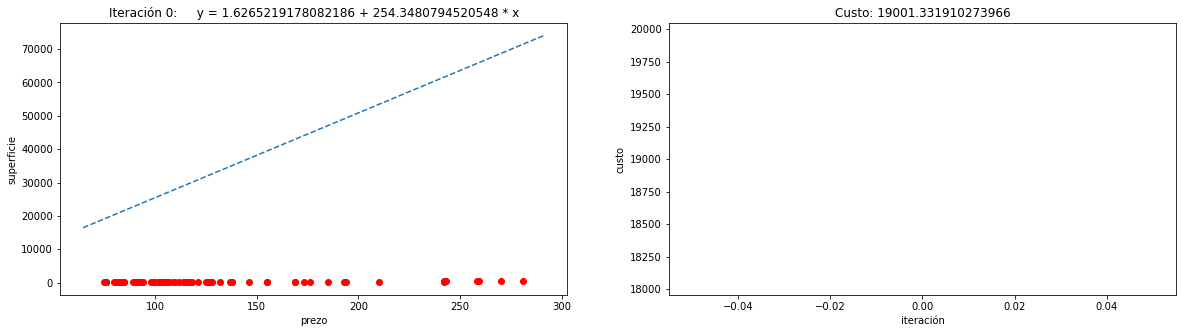

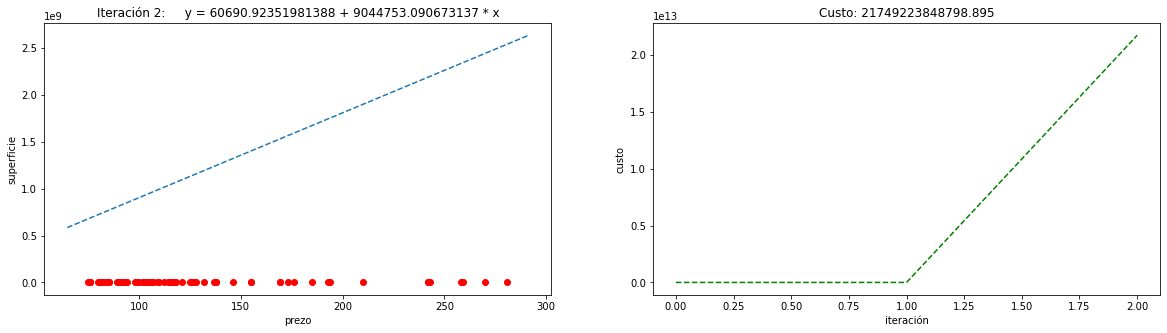

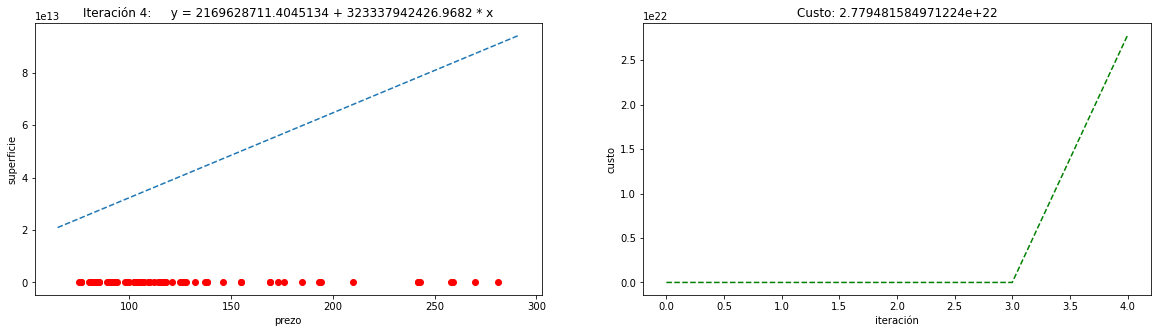

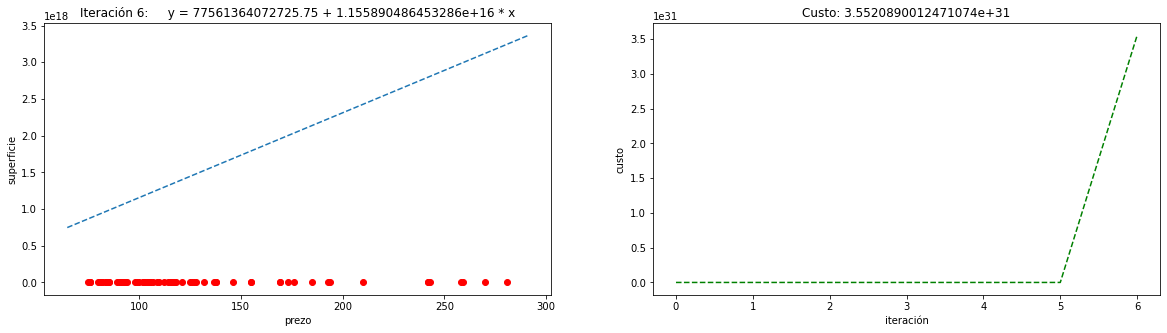

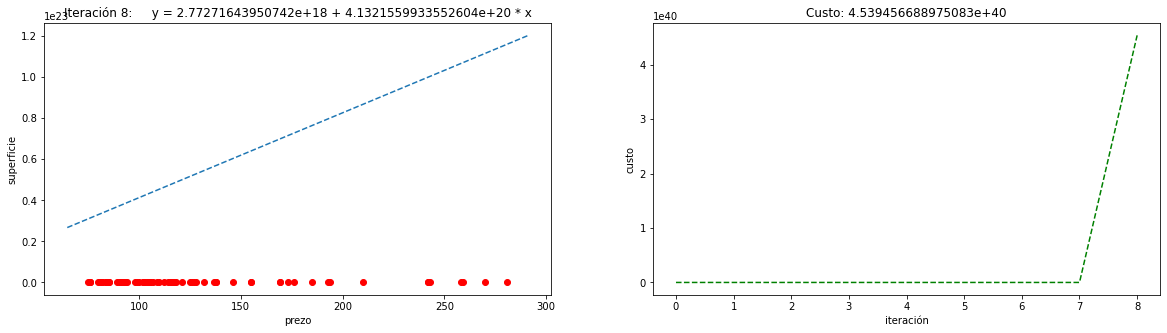

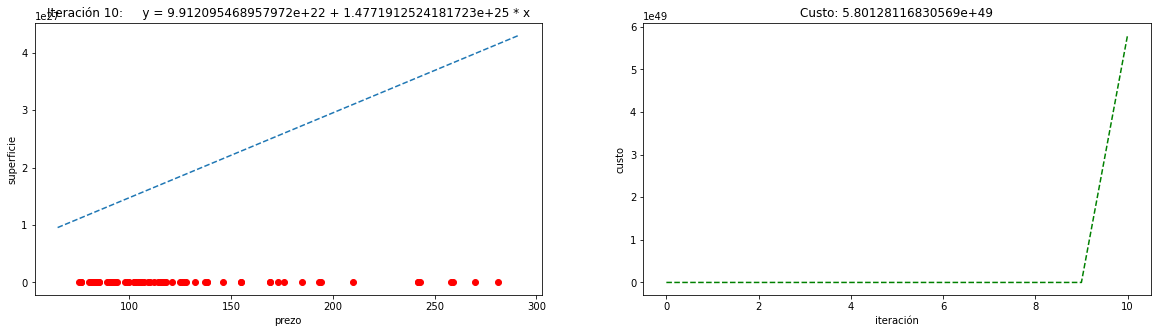

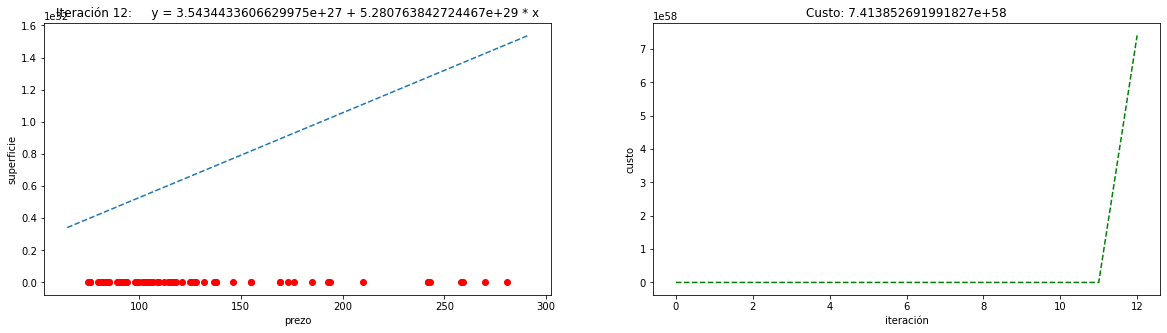

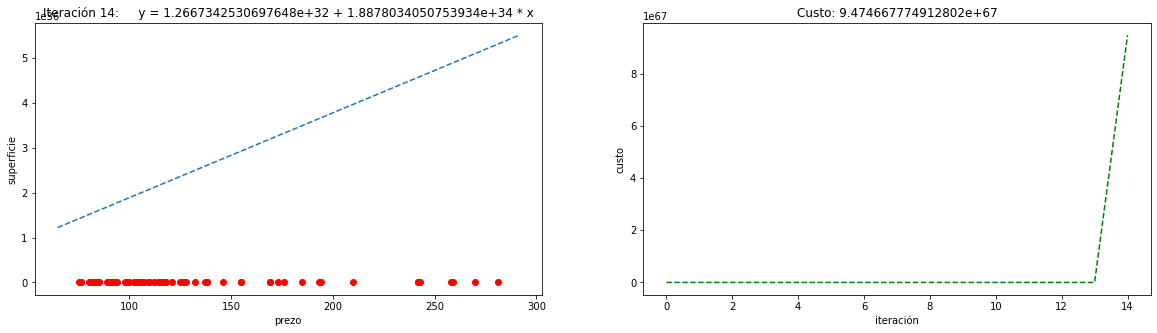

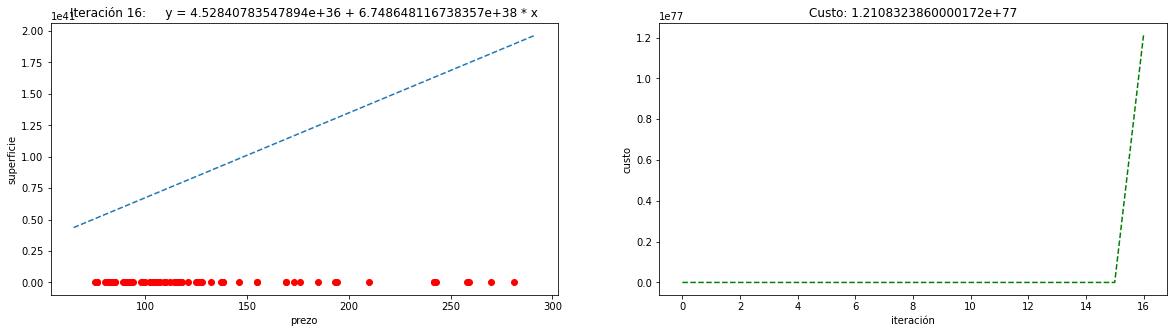

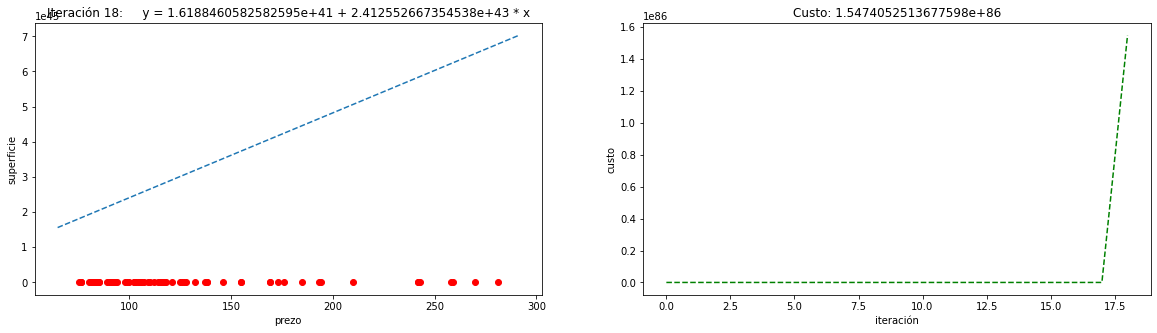

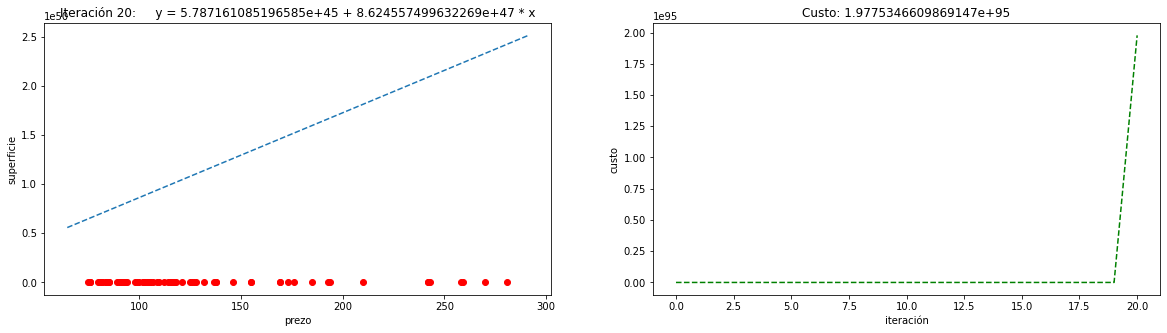

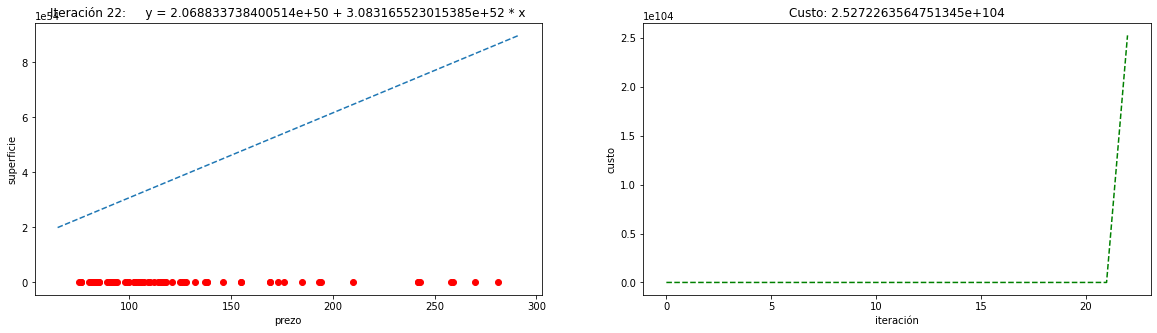

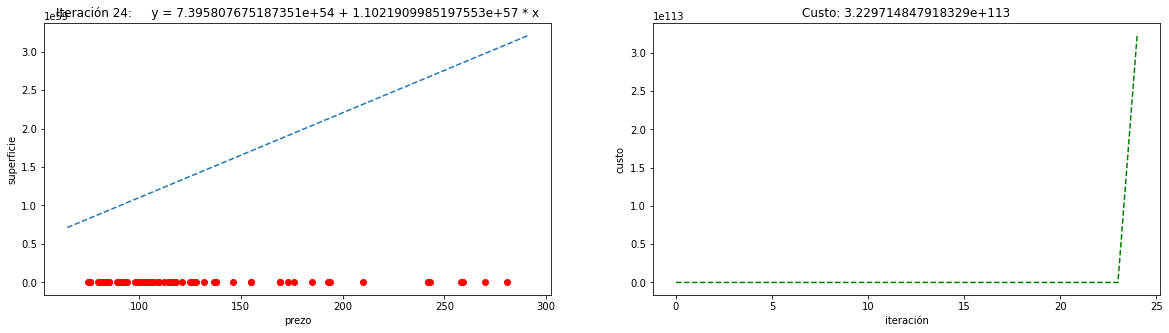

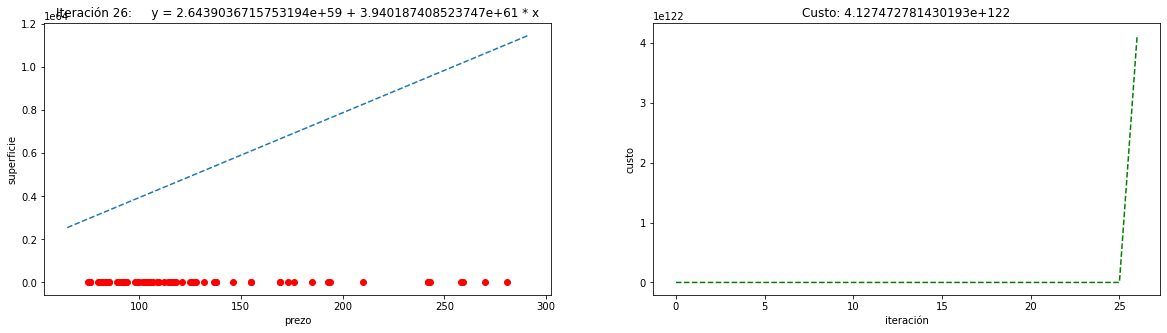

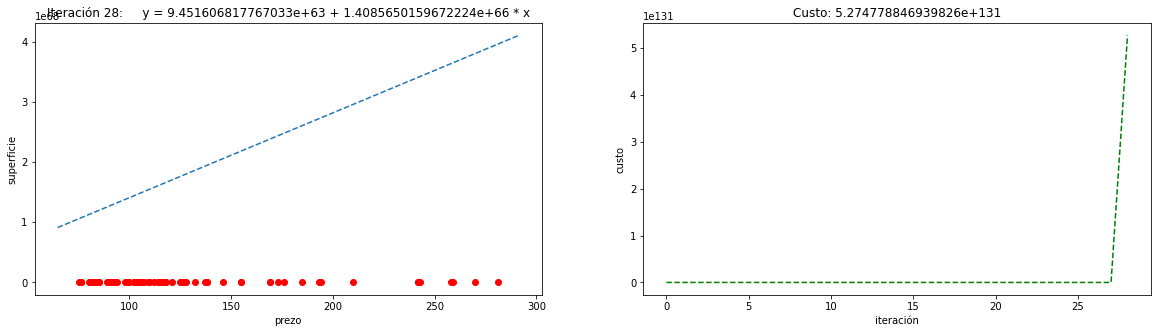

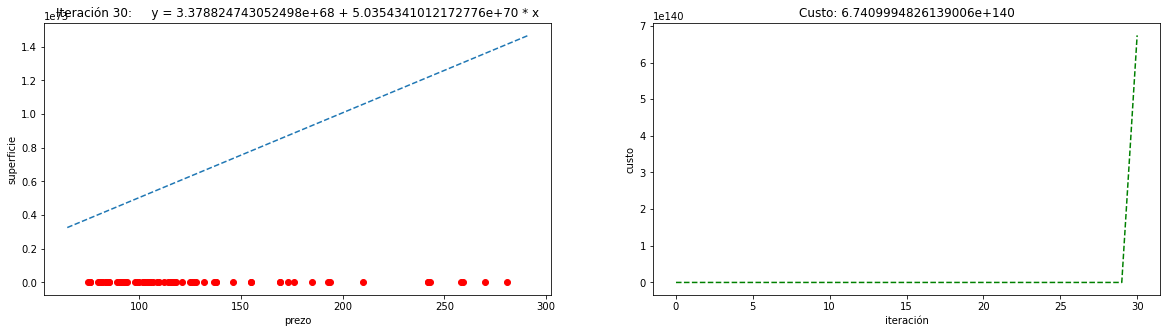

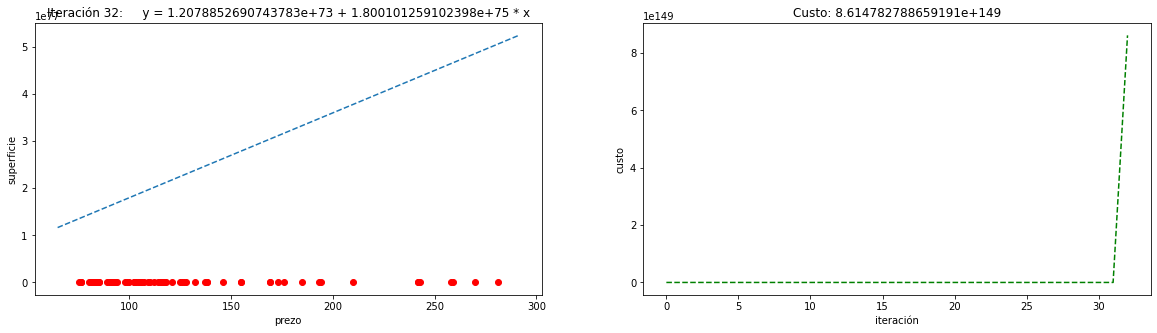

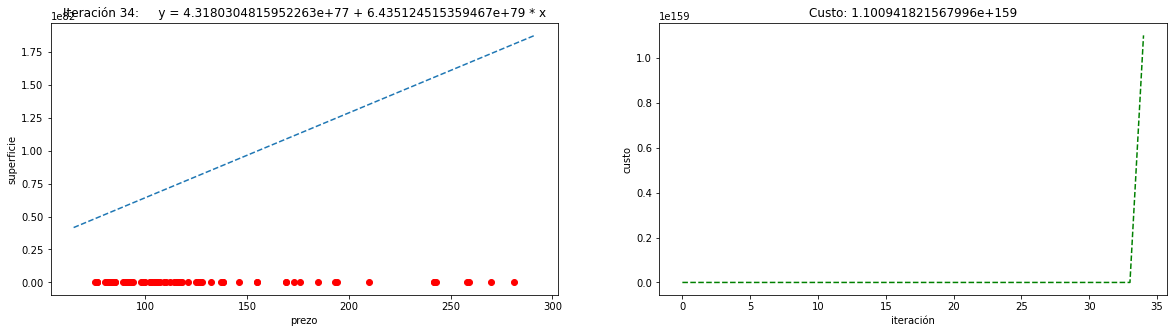

In [18]:
# Desactivamos a interactividade das figuras. Xa non nos interesa
%matplotlib inline

desc_grad(vivendas['superficie'], vivendas['prezo'], alpha =  0.01
          , iteracions = 35)

> ❓ **_Pregunta 4._**  Explica brevemente e coas túas palabras como funciona o método de descenso do gradiente. Axúdate do problema das vivendas e das gráficas anteriores na túa explicación.

**RESPUESTA**

El método del gradiente busca aproximarse a una solución óptima a un problema al iterar repetitivamente un método que tome decisionnes basándose en una función de coste y otra que calcule el error cuadrático medio. A partir de esta toma de decisiones, si  los parametros que se le pasan son correctos, el método irá convergiendo hacia una solución para el problema propuesto.

En este caso, a partir de los puntos va iterando con diferentes soluciones las cuales van reduciendo el coste, es decir, el error acumulado por la solución. De esta manera conseguimos una solución que se mejore las prestaciones de la solución anterior y que tenga un error menor.

> ❓ **_Pregunta 5._**  Proba a executar o algoritmo variando o parámetro *alpha* ($\alpha$) e o número de iteracións (podes editar o script anterior ou crear outro na sección de respostas). Analiza os resultados. Cal é a función do parámetro $\alpha$? Que sucede con valores de $\alpha$ máis grandes (por exemplo, $\alpha = 0.01$)? Cantas iteracións dirías que son necesarias para obter unha regresión aceptable?

**RESPUESTA**

En este apartado se nos inivita a modificar 2 parametros: alpha y el numero de iteraciones.

En caso de modificar el numero de itereaciones, podemos observar como al aumentar las iteraciones a un numero superior, como podía ser 50 iteraciones; cada vez las iteraciones tiene una mejoría mucho menor, ya que por ejemplo entre la iteración 50 y la 49 solo existe una mejoría menor a una centésima. Al ser una mejora tan pequeña muchas veces no merecerá la pena, pero todo dependerá de la precisión necesaria. Por otro lado, si disminuimos las iteraciones, obtenemos soluciones menos eficientes y con un mayor error. Aqui, volvemos a repetir que todo dependerá de lo que se quiera primar, el cálculo o la precisión.

En el caso de modificar el parámetro alpha, podemos observar como si le asignamos valores muy grandes como 0.001, la precisión es muy pequeña y nos dan soluciones con errores gigantescos y con costes muy superiores al billón. Por otro lado, al hacer mas pequeño el valor de alpha con por ejemplo 0.0000001, aunque tengamos mayor precisión está nos puede llevar por caminos equivocados al crearnos una idea poco global del problema y llegar a converger en soluciones que empeoran las que obteniamos antes con menor precisión. Lo importante será elegir un valor para alpha que se ajuste al problema, no necesariamente un valor menor.

## Construción dun modelo con `LinearRegression`

A libraría `scikit-learn` facilítanos a construción de modelos con funcións xa programadas, de xeito que non é preciso que implementemos o descenso do gradiente a man. Imos repetir o proceso anterior empregando agora a clase `sklearn.linear_model.LinearRegression`. A súa invocación é moi simple:

In [19]:
from sklearn.linear_model import LinearRegression  # Importamos a clase (isto sólo é necesario facelo unha vez)
from sklearn.metrics import classification_report

# Dividimos o dataset en variables predictoras e dependentes
vivendas_X = vivendas.loc[:, :'superficie'].astype(float)
vivendas_Y = vivendas.loc[:, 'prezo']

model = LinearRegression()  # Definimos o modelo
model.fit(vivendas_X, vivendas_Y)  # Axustamos o modelo aos datos

# Resumo do modelo
coef = pd.DataFrame([model.intercept_, *model.coef_], ['(Intercept)', *vivendas_X.columns], columns=['Coefficients'])
coef

,Coefficients
(Intercept),-55.577885
superficie,1.711149


In [21]:
h(80,-55.577885,1.711149)

81.31403499999999

> ❓ **_Pregunta 6._**  Explica moi brevemente a saída deste último script. 

**RESPUESTA**

Lo que se muestra son los coeficientes que nos definen la propia predicción obtenida. Intercept sería donde la predicción se corta con el eje Y y superficie la inclinación de la recta.

## Avaliación do modelo

Ata agora vimos como construir un modelo de regresión lineal empregando todo o dataset. Sen embargo, se o facemos deste xeito non temos forma de obter unha medida realista de como vai render o modelo con datos novos. Porén, unha boa práctica é dividir o dataset en dous conxuntos, un de adestramento (*training*) e outro de test. Habitualmente resérvase arredor do 70% dos datos para adestramento e o 30% restante para test, aínda que isto son só referencias xerais. O modelo é construído empregando o conxunto de adestramento e posteriormente é avaliado sobre o conxunto de test.


En Python podemos crear os subconxuntos de adestramento e test coa axuda da función `train_test_split()` da libraría `scikit-learn`, para así tomar unha mostra aleatoria dos datos. Para obter todos os mesmos resultados definimos unha semente coa función `random.seed()` de `NumPy`. Deste xeito, non importa cantas veces executemos o script, `train_test_split` sempre fará a mesma selección.

In [22]:
from sklearn.model_selection import train_test_split
SEED_VALUE = 123  # NON CAMBIES ESTE SEED, así todos teremos os mesmos resultados

np.random.seed(SEED_VALUE)
vivendas_train, vivendas_test = train_test_split(vivendas, test_size=0.3, random_state=SEED_VALUE)

print('Tamaño train: {}'.format(vivendas_train.shape[0]))
print('Tamaño test: {}'.format(vivendas_test.shape[0]))

Tamaño train: 51
Tamaño test: 22


Construimos o modelo empregando só o conxunto de adestramento:

In [23]:
# Dividimos o dataset en variables predictoras e dependentes
vivendas_train_X = vivendas_train.loc[:, :'superficie'].astype(float)
vivendas_train_Y = vivendas_train.loc[:, 'prezo']

model = LinearRegression()  # Definimos o modelo
np.random.seed(SEED_VALUE)
model.fit(vivendas_train_X, vivendas_train_Y)  # Axustamos o modelo aos datos

# Resumo do modelo
coef = pd.DataFrame([model.intercept_, *model.coef_], ['(Intercept)', *vivendas_train_X.columns], columns=['Coefficients'])
coef

,Coefficients
(Intercept),-34.426839
superficie,1.510870


Agora predicimos os valores das vivendas do conxunto de validación coa axuda da función `.predict()`:

In [24]:
# Dividimos o dataset en variables predictoras e dependentes
vivendas_test_X = vivendas_test.loc[:, :'superficie'].astype(float)
vivendas_test_Y = vivendas_test.loc[:, 'prezo']

np.random.seed(SEED_VALUE)
predicions = model.predict(vivendas_test_X)
predicions

array([257.17108422, 119.68190805, 119.68190805, 332.71458762,
       258.68195429, 165.00801008, 127.23625839, 331.20371755,
        80.39928628, 140.834089  , 121.19277811,  92.48624682,
       282.85587538, 124.21451825, 142.34495906, 125.72538832,
       142.34495906, 220.91020259, 131.76886859, 139.32321893,
       356.8885087 ,  86.44276655])

A función anterior simplemente obtén os prezos das vivendas do conxunto de test a partires da función de regresión lineal que axusta o modelo. Observa que outra forma de facer esta predición é empregando a función $h_\theta(x)$ que definimos antes indicando os coeficientes $\theta_0$ e $\theta_1$ do noso modelo:

In [26]:
predicions2 = h(vivendas_test_X, th0=coef['Coefficients']['(Intercept)'], th1=coef['Coefficients']['superficie'])

As predicións dos conxuntos `predicions` e `predicions2` deberían coincidir:

In [27]:
print('Predicións obtidas coa función .predict():')
print(predicions)
print()
print('Predicións obtidas coa función h:')
print(predicions2.to_numpy()[:, 0])

Predicións obtidas coa función .predict():
[257.17108422 119.68190805 119.68190805 332.71458762 258.68195429
 165.00801008 127.23625839 331.20371755  80.39928628 140.834089
 121.19277811  92.48624682 282.85587538 124.21451825 142.34495906
 125.72538832 142.34495906 220.91020259 131.76886859 139.32321893
 356.8885087   86.44276655]

Predicións obtidas coa función h:
[257.17108422 119.68190805 119.68190805 332.71458762 258.68195429
 165.00801008 127.23625839 331.20371755  80.39928628 140.834089
 121.19277811  92.48624682 282.85587538 124.21451825 142.34495906
 125.72538832 142.34495906 220.91020259 131.76886859 139.32321893
 356.8885087   86.44276655]


Como dispomos das predicións dos prezos das vivendas do conxunto de test e tamén coñecemos os seus prezos reais, agora podemos avaliar o rendemento do noso modelo. Por exemplo, podemos empregar de novo o erro cadrático medio: 

In [28]:
e_cadratico = ecm(vivendas_test_Y, predicions)
print(e_cadratico)

1775.6429474014146


O problema do erro cadrático medio é que non resulta un indicador moi intuitivo. Sen embargo, podemos calcular a súa raíz cadrada para obter unha estimación do erro en miles de euros:

In [29]:
np.sqrt(e_cadratico)

42.13837855686209

Outra posibilidade é empregar o índice de correlación entre os datos reais e as predicións:

In [30]:
vivendas_test_Y.corr(pd.Series(predicions, vivendas_test_Y._index))


0.9160621867265676

Como vemos, o índice de correlación é practicamente 1, polo que podemos afirmar que ambos vectores están moi correlacionados positivamente. Isto é sinal de que estamos a realizar boas predicións.

> ❓ **_Pregunta 7._**  Por que non sería axeitado avaliar o rendemento do noso modelo empregando os mesmos datos cos que o adestramos?

**RESPUESTA**

Esto se debe a que la predicción se ha construido para semejarse a estos mismos datos, por lo que no se estaría probando nuestra predicción para otros casos, y por lo general, la predicción será correcta ya que ha sido entrenada para exactamente esos mismos casos.

Se necesita probar con datos nuevos, para así poder asegurarnos de que la predicción es correcta y se ajusta a la realidad; y no solo a la realidad de los datos con la que lo entrenamos.

## Identificación de valores atípicos (*outliers*)

Os valores atípicos, anómalos ou *outliers* son instancias do noso conxunto de datos que non seguen a tendencia habitual do dataset, sendo numéricamente distantes ao resto dos datos. Noutras palabras, son instancias que parecen inconsistentes co resto dos valores do dataset. Debemos evitar que o noso conxunto de adestramento presente estes datos atípicos xa que poden deteriorar moito a calidade dos nosos modelos. 

Imos ver un exemplo sinxelo de como identificar *outliers* e analizaremos o seu impacto na calidade do modelo do prezo das vivendas. Ten en conta que esta é unha etapa habitual no preprocesado dos datos. Nós excepcionalmente ímola abordar agora aínda, tras ter un modelo, con fins ilustrativos.

Os diagramas de caixa, ou *boxplots*, son gráficos baseados en cuartiles que nos permite visualizar a distribución do conxunto de datos para cada unha das variables. En Python podemos visualizalos coa función `boxplot()` de `matplotlib`:

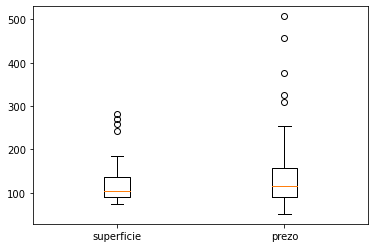

In [31]:
box = plt.boxplot(vivendas_train, labels=vivendas_train.columns)

Dentro da caixa atópase o 50% dos datos. Os datos máis atípicos (círculos) están fora dos brazos da caixa. Vemos que ambas variables presentan uns poucos *outliers* na súa distribución. Estes *outliers* coñécense como univariados porque están presentes na distribución dunha soa variable. Podemos saber os valores deses *outliers* do seguinte xeito:

In [32]:
out_superficie = box["fliers"][0].get_data()[1]
out_prezo = box["fliers"][1].get_data()[1]

print("Outliers na variable 'superficie': {}".format(out_superficie))
print("Outliers na variable 'prezo': {}".format(out_prezo))

Outliers na variable 'superficie': [258. 270. 242. 281.]
Outliers na variable 'prezo': [308.53 457.11 376.51 325.61 507.09]


Así coñecemos as superficies e prezos atípicas. Agora ben, que un exemplo sexa *outlier* nalgunha das dimensións non implica que sexa realmente un dato atípico no noso problema. Por exemplo, que unha vivenda teña unha superficie de 281 metros cadrados pode ser un valor atípico da dimensión Superficie se a maioría das vivendas son pequenas no dataset. Do mesmo modo, unha vivenda que custe preto de 500.000 euros pode ser atípica se o precio medio da vivenda é moito inferior. 

Os *outliers* dos que realmente nos temos que preocupar son aqueles *outliers* multivariados, é dicir, que disten da tendencia nas dúas dimensións, superficie-prezo. Existen métodos de identificación de outliers en máis dunha dimensión pero, debido á súa complexidade, quedan fora desta práctica. Posto que o noso problema conta con poucas instancias, podemos facer unha inspección visual e manual:

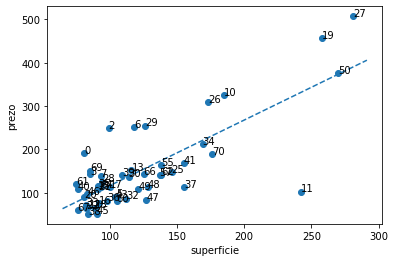

In [33]:
# Creamos o entorno
fig = plt.figure()  # Creamos unha figura (contenedor para elementos a debuxar)
ax = fig.add_subplot(111, projection='rectilinear')  # Engadimos un Axes á figura (contén os elementos do debuxo)
plt.xlabel("superficie")  # Nombramos os eixos
plt.ylabel("prezo")

# Debuxamos o scatter
ax.scatter(vivendas_train['superficie'], vivendas_train['prezo'])

# Creamos e mostramos a recta
line_x_vals = np.array(ax.get_xlim())
line_y_vals = coef['Coefficients']['(Intercept)'] + coef['Coefficients']['superficie'] * line_x_vals
ax.plot(line_x_vals, line_y_vals, '--')

# Imprimimos os identificadores
for i in vivendas_train.index:
    ax.text(vivendas_train['superficie'][i], vivendas_train['prezo'][i], i)

plt.show()

Se nos fixamos no gráfico de dispersión, existe un valor moito máis distante da recta de regresión que o resto:

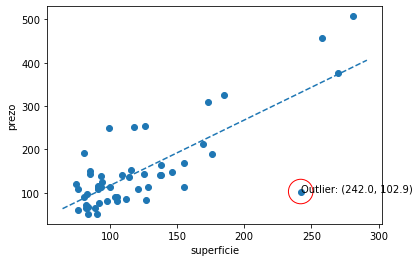

In [35]:
# Creamos o entorno
fig = plt.figure()  # Creamos unha figura (contenedor para elementos a debuxar)
ax = fig.add_subplot(111, projection='rectilinear')  # Engadimos un Axes á figura (contén os elementos do debuxo)
plt.xlabel("superficie")  # Nombramos os eixos
plt.ylabel("prezo")

# Debuxamos o scatter
ax.scatter(vivendas_train['superficie'], vivendas_train['prezo'])

# Mostramos a recta
ax.plot(line_x_vals, line_y_vals, '--')

# Marcamos o outlier
outlier_id = 11
outlier = vivendas_train.loc[outlier_id]
ax.scatter(outlier['superficie'], outlier['prezo'], s=600, facecolors='none', edgecolors='r')
ax.text(outlier['superficie'], outlier['prezo'],
        'Outlier: ({}, {})'.format(outlier['superficie'], outlier['prezo']))
plt.show()

Imos ver se podemos mellorar a calidade do modelo prescindindo deste dato atípico. Eliminámolo do conxunto de adestramento e adestramos un novo modelo:

In [36]:
# Eliminamos o outlier do conxunto
vivendas_train = vivendas_train.drop(outlier_id)

# Dividimos o dataset en variables predictoras e dependentes
vivendas_train_X = vivendas_train.loc[:, :'superficie'].astype(float)
vivendas_train_Y = vivendas_train.loc[:, 'prezo']

new_model = LinearRegression()  # Definimos un novo modelo
new_model.fit(vivendas_train_X, vivendas_train_Y)  # Axustamos o novo modelo aos datos

# Resumo do modelo
new_coef = pd.DataFrame([new_model.intercept_, *new_model.coef_], ['(Intercept)', *vivendas_train_X.columns], columns=['Coefficients'])
new_coef

,Coefficients
(Intercept),-59.680167
superficie,1.759946


Graficamos para ver a diferenza entre o novo modelo sen o outlier e o vello:

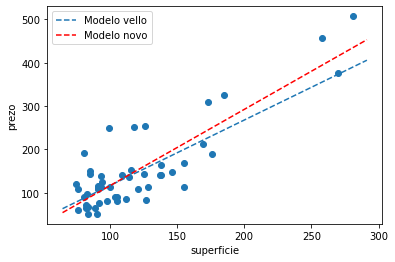

In [38]:
# Creamos o entorno
fig = plt.figure()  # Creamos unha figura (contenedor para elementos a debuxar)
ax = fig.add_subplot(111, projection='rectilinear')  # Engadimos un Axes á figura (contén os elementos do debuxo)
plt.xlabel("superficie")  # Nombramos os eixos
plt.ylabel("prezo")

# Debuxamos o scatter
ax.scatter(vivendas_train['superficie'], vivendas_train['prezo'])

# Creamos e mostramos a recta antiga
line_x_vals = np.array(ax.get_xlim())
line_y_vals = coef['Coefficients']['(Intercept)'] + coef['Coefficients']['superficie'] * line_x_vals
ax.plot(line_x_vals, line_y_vals, '--', label='Modelo vello')

# Creamos e mostramos a recta nova
line_y_vals = new_coef['Coefficients']['(Intercept)'] + new_coef['Coefficients']['superficie'] * line_x_vals
ax.plot(line_x_vals, line_y_vals, '--', color='r', label='Modelo novo')

ax.legend()  # Facemos que se mostren as labels

plt.show()

Realizamos de novo a predición sobre o conxunto de test e avaliamos o rendemento:

In [39]:
novas_predicions = new_model.predict(vivendas_test_X)
e_cadratico_novo = ecm(vivendas_test_Y, novas_predicions)

print(np.sqrt(e_cadratico_novo))
vivendas_test_Y.corr(pd.Series(novas_predicions, vivendas_test_Y._index))

37.01214130291502


0.9160621867265678

> ❓ **_Pregunta 8._**  Analiza brevemente o impacto do *outlier* no modelo de regresión.

**RESPUESTA**

Los valores atípicos, que por su propia definición son anómalos o excepciones, pueden hacer que la predicción que hacemos se vea afectada de manera determinante al modificar mucho las medias de los valores, cuando en realidad son valores que solo se darán en casos excepcionales.

Es por ello que detectarlos es importante para no incluirlos o darle un peso menor al trazar nuestras predicciones, y asi, que estas tengan mejores resultados en las funciones de coste u otras medidas que determinan la calidad de nuestras predicciones al acercarse mas a la realidad y los valores normales que se toman.

**************************************************************

# Respostas ao cuestionario (4 puntos)

**LEMBRA:** Non esquezas de escribir teu nome e apelidos na segunda celda do presente documento.

**Pregunta 1**

Hay 73 filas de 2 columnas. En cada fila se almacena primeramente la superficie (integer) y posteriormente el precio (float). La manera que encontramos es vivendas.iloc[n], donde n es la posición de la que deseamos conocer lps valores. En este caso como queremos la poscion 50 ejecutamos: vivendas.iloc[50] y obtenemos la siguiente salida:

superficie    270.00

prezo         376.51

Name: 50, dtype: float64


**Pregunta 2**

El precio medio de la venta de los inmuebles es de 162.652192.

Los 25%, 50% e 75% son el primer cuartil, la mediana y el tercer cuartil.

La mediana del precio es 119.730000 y la de la superficie es 109.000000.

**Pregunta 3**

En general los puntos están bastante concentrados y dibuja una corriente ascendente. Aunque hay valores que se salen de este orden (valores atípicos), los demás puntos si que siguen un orden claro y ascendente. Esto nos permite intuir que a mayor superficie, mayor es el precio en la mayoría de los casos.

**Pregunta 4**

El método del gradiente busca aproximarse a una solución óptima a un problema al iterar repetitivamente un método que tome decisionnes basándose en una función de coste y otra que calcule el error cuadrático medio. A partir de esta toma de decisiones, si  los parametros que se le pasan son correctos, el método irá convergiendo hacia una solución para el problema propuesto.

En este caso, a partir de los puntos va iterando con diferentes soluciones las cuales van reduciendo el coste, es decir, el error acumulado por la solución. De esta manera conseguimos una solución que se mejore las prestaciones de la solución anterior y que tenga un error menor.

**Pregunta 5**

En este apartado se nos inivita a modificar 2 parametros: alpha y el numero de iteraciones.

En caso de modificar el numero de itereaciones, podemos observar como al aumentar las iteraciones a un numero superior, como podía ser 50 iteraciones; cada vez las iteraciones tiene una mejoría mucho menor, ya que por ejemplo entre la iteración 50 y la 49 solo existe una mejoría menor a una centésima. Al ser una mejora tan pequeña muchas veces no merecerá la pena, pero todo dependerá de la precisión necesaria. Por otro lado, si disminuimos las iteraciones, obtenemos soluciones menos eficientes y con un mayor error. Aqui, volvemos a repetir que todo dependerá de lo que se quiera primar, el cálculo o la precisión.

En el caso de modificar el parámetro alpha, podemos observar como si le asignamos valores muy grandes como 0.001, la precisión es muy pequeña y nos dan soluciones con errores gigantescos y con costes muy superiores al billón. Por otro lado, al hacer mas pequeño el valor de alpha con por ejemplo 0.0000001, aunque tengamos mayor precisión está nos puede llevar por caminos equivocados al crearnos una idea poco global del problema y llegar a converger en soluciones que empeoran las que obteniamos antes con menor precisión. Lo importante será elegir un valor para alpha que se ajuste al problema, no necesariamente un valor menor.

**Pregunta 6**

Lo que se muestra son los coeficientes que nos definen la propia predicción obtenida. Intercept sería donde la predicción se corta con el eje Y y superficie la inclinación de la recta.

**Pregunta 7**

Esto se debe a que la predicción se ha construido para semejarse a estos mismos datos, por lo que no se estaría probando nuestra predicción para otros casos, y por lo general, la predicción será correcta ya que ha sido entrenada para exactamente esos mismos casos.

Se necesita probar con datos nuevos, para así poder asegurarnos de que la predicción es correcta y se ajusta a la realidad; y no solo a la realidad de los datos con la que lo entrenamos.

**Pregunta 8**

Los valores atípicos, que por su propia definición son anómalos o excepciones, pueden hacer que la predicción que hacemos se vea afectada de manera determinante al modificar mucho las medias de los valores, cuando en realidad son valores que solo se darán en casos excepcionales.

Es por ello que detectarlos es importante para no incluirlos o darle un peso menor al trazar nuestras predicciones, y asi, que estas tengan mejores resultados en las funciones de coste u otras medidas que determinan la calidad de nuestras predicciones al acercarse mas a la realidad y los valores normales que se toman.

**************************************************************

# Modelado dun problema de libre elección 

## Enunciado

O problema sobre o que acabamos de traballar é un "exemplo xoguete". Na realidade, resultaría difícil poder predicir con exactitude o prezo dunha vivenda tendo en conta só unha variable (neste caso, a superficie). O máis probable é que outros factores contribúan a estimar un bo prezo para os inmobles. Algúns exemplos de outras variables continuas que se poderían empregar son a súa antigüidade, a distancia ao centro urbán máis próximo, o custo da vida na cidade, rexión ou país onde se ubica, etc.

Pon en práctica os teus coñecementos de regresión lineal e intenta crear agora ti un modelo que se adapte a un problema cotiá. Elixe algún problema sinxelo, o que se che ocorra (con variables cuantitativas, por suposto). O único requerimento obrigatorio é **empregar exactamente DÚAS variables preditoras** no adestramento do modelo de regresión. Escolle como variables preditoras aquelas que penses que poden estar linealmente correlacionada coa variable que queres predicir. Aquí tes un par de exemplos para que che veña a inspiración: 

a) obter a nota media de cada un dos alumnos do GrEI ($y$) en base ás horas que adican a estudar semanalmente ($x_1$) e a súa idade ($x_2$). 
b) estimar o prezo dun cuarto ($y$) en función da distancia do hotel ao centro da cidade ($x_1$) e da nota media do mesmo en Booking.com ($x_2$).

Deberás recadar datos e construir un pequeno dataset, pero non invistas demasiado tempo nisto, basta con que dispoñas dun conxunto suficientemente representativo para levar a cabo a regresión. É dicir, **como mínimo debe ter 3 variables (2 predictoras + 1 obxectivo) e un número prudente de instancias, por exemplo 40**. Se non se che ocorre ningúnha idea boa... non pasa nada! Outra opción é que empregues algún dataset que atopes na web, hai moitos portais de onde podes sacar datos. Por exemplo Kaggle, a maior comunidade de ciencia de datos e aprendizaxe automática online. Aquí tes algunhas ligazóns que podes consultar:

- ["friendly" datasets en Kaggle](https://www.kaggle.com/rtatman/fun-beginner-friendly-datasets)
- [outros datasets faciliños pensados para regresión](https://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html)

Sexa cal sexa a túa decisión, asegúrate de comprender ben o problema e a información que estás a manexar. Fai un breve estudo dos teus datos, incluíndo gráficas e comentarios propios. De ser preciso, aplica as etapas de preprocesado que consideres, pero coidado se descargas un dataset da web, porque quizáis che implique facer un preprocesado demasiado complexo, para o que non estás preparado aínda. Logo, obtén o modelo e avalía o seu rendemento. Non pasa nada se finalmente non hai unha boa correlación entre as variables preditoras e a variable obxectivo e o modelo realiza malas predicións. A finalidade deste exercicio é abordar un problema real e que realices un bo procedemento de análise de datos en base ao aprendido.

Explica o teu problema e obtén un modelo seguindo as boas prácticas que levamos visto. Na avaliación do exercicio terase en conta a complexidade do problema e da solución (análise, preprocesado, adestramento e test), así como a claridade nas explicacións e a boa estruturación do traballo realizado. Proporciona todo o código que consideres necesario empregando scripts como os do exercicio anterior. Ao entregar esta práctica deberás incluir tamén o arquivo cos datos do teu problema no formato que che resulte máis cómodo (.csv, .txt, etc.).

**************************************************************

## Resposta (6 puntos)

En este apartado vamos a crear una predicción para el precio de los delanteros de futbol. Las variables observadas serán la edad y los goles que hayan anotado a lo largo de su carrera y la que se querrá predecir será el precio del jugador. Se analizarán 50 datos, que fueron recopilados de las paginas transfermarkt y fichajes.com. En la primera columna se almacena la edad, en la segundad los goles anotados a lo largo de toda su carrera y por último el valor de mercado en millones de eurosque estos tienen.

In [57]:
# introducimos los datos en el .txt y los guardamos en delanteros

import pandas as pd  # Importamos a librería (isto sólo é necesario facelo unha vez)
import numpy as np

delanteros = pd.read_csv('delanteros_masValiosos.txt',  # Cargamos o csv
                       delimiter=',',
                       header=0)


Ahora para poder hacer la valoración de la predicción mas real dividiremos los datos: el 70% para entrenar la predicción y el 30% para poder comprobar que las predicciones son correctas.

In [58]:
from sklearn.model_selection import train_test_split
SEED_VALUE = 123  # NON CAMBIES ESTE SEED, así todos teremos os mesmos resultados

np.random.seed(SEED_VALUE)
delanteros_train, delanteros_test = train_test_split(delanteros, test_size=0.3, random_state=SEED_VALUE)

print('Tamaño train: {}'.format(delanteros_train.shape[0]))
print('Tamaño test: {}'.format(delanteros_test.shape[0]))

Tamaño train: 35
Tamaño test: 15


Calculamos los coeficientes del modelo con los datos reservados para el entrenamiento, que nos definirán la prediccion:

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

delanteros_X = pd.DataFrame(np.c_[delanteros_train['edad'], delanteros_train['goles']], columns = ['edad', 'goles'])
delanteros_Y = delanteros_train['precio']

model = LinearRegression()
model.fit(delanteros_X, delanteros_Y)

coef = pd.DataFrame([model.intercept_,model.coef_[0], model.coef_[1]], ['(Intercept)', delanteros_X.columns[0], delanteros.columns[1]], columns=['Coefficients'])
coef

,Coefficients
(Intercept),182.440736
edad,-5.498809
goles,0.137002


Representamos gráficamente la solución obtenida:

<IPython.core.display.Javascript object>


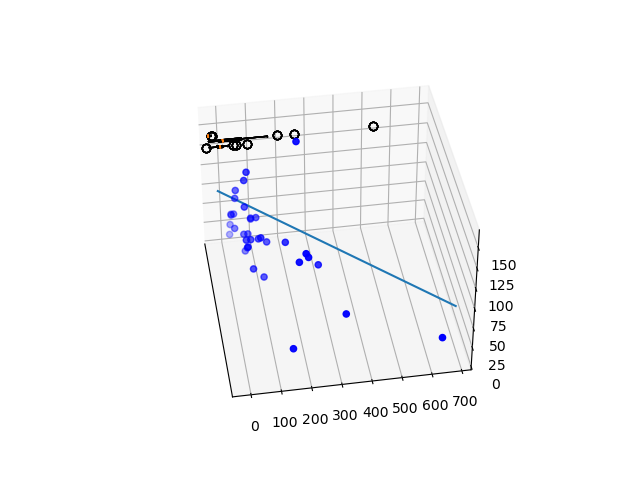

In [13]:
# Creamos o entorno
fig = plt.figure()  # Creamos unha figura (contenedor para elementos a debuxar)
ax = fig.add_subplot(111, projection='3d')  # Engadimos un Axes á figura (contén os elementos do debuxo)

x=delanteros_train["edad"]
x=delanteros_train["goles"]
x=delanteros_train["precio"]

# Debuxamos o scatter
ax.scatter(delanteros_train['edad'], delanteros_train['goles'], delanteros_train['precio'],c='b',marker='o')

# Creamos e mostramos a recta
line_x_vals = np.array(ax.get_xlim())
line_y_vals = np.array(ax.get_ylim())
line_z_vals = coef['Coefficients']['(Intercept)'] +coef['Coefficients']['edad']* line_x_vals+ coef['Coefficients']['goles'] * line_y_vals
ax.plot(line_x_vals, line_y_vals, line_z_vals)

plt.show()

Calculamos las predicciones para poder calcular el error de 2 maneras diferentes: por le metodo predict y creando una funcion h. Ahora ya trabajamos con los datos reservados para el testeo.

In [14]:
# Dividimos o dataset en variables predictoras e dependentes
delanteros_test_X = delanteros_test[['edad','goles']]
delanteros_test_Z = delanteros_test.loc[:, 'precio']


np.random.seed(SEED_VALUE)
predicions = model.predict(delanteros_test_X)
#predicions

In [15]:
### Función de regresión lineal h ###
def h(x,y, th0, th1, th2):
    return (th0 + x * th1 + y * th2)

predicions2 = h(delanteros_test_X['edad'], delanteros_test_X['goles'], 
                th0=coef['Coefficients']['(Intercept)'], th1=coef['Coefficients']['edad'],
                th2=coef['Coefficients']['goles'])
#predicions2

Obtenemos en ambos casos la misma solución:

In [19]:
print(predicions)

print(predicions2)

[66.26199912 65.52075361 58.25967036 74.79358827 39.86396812 83.11319231
 46.96930391 64.56174261 43.23276973 57.57466251 51.6461032  67.76901639
 54.97163267 35.83468492 65.58277163]
10    66.261999
13    65.520754
30    58.259670
46    74.793588
18    39.863968
0     83.113192
40    46.969304
12    64.561743
29    43.232770
8     57.574663
21    51.646103
47    67.769016
11    54.971633
41    35.834685
5     65.582772
dtype: float64


Obtenemos el error cuadrático para observar la calidad de la predicción:

In [20]:
e_cadratico = ecm(delanteros_test_Z, predicions)
print(e_cadratico)

505.184640347016


Para obtener un valor mas fácil identificable calculamos la raíz del error cuadrático para obtener una estimación del error en millones de euros.

In [21]:
np.sqrt(e_cadratico)

22.476312872600257

Otro indicador es la correlación entre la precidicción y los resultado reales de los datos reservados para el testeo. Podemos afirmar que existe correlación pero esta es débil al estar en un punto medio entre 0 y 1.

In [22]:
delanteros_test_Z.corr(pd.Series(predicions, delanteros_test_Z._index))

0.4477547369543903

Para mejorar estos resultados vamos a eliminar los valores a típicos que nos afectan a la predicción y no son comunes. Así los localizamos y volvemos a imprimir los puntos por pantalla para poder observar cuales son realmente atípicos; ya que por serlo en una dimensión no nos quiere decir que lo sea en su conjunto.

In [30]:
box = plt.boxplot(delanteros_train, labels=delanteros_train.columns)

In [31]:
out_edad = box["fliers"][0].get_data()[1]
out_goles = box["fliers"][1].get_data()[1]
out_precio =  box["fliers"][2].get_data()[1]

print("Outliers na variable 'edad': {}".format(out_edad))
print("Outliers na variable 'goles': {}".format(out_goles))
print("Outliers na variable 'precio': {}".format(out_precio))

Outliers na variable 'edad': [0.094822   0.09484115]
Outliers na variable 'goles': [0.08505153 0.08860596 0.0879874 ]
Outliers na variable 'precio': [0.08738495 0.08590274 0.08638747 0.08629055]


<IPython.core.display.Javascript object>


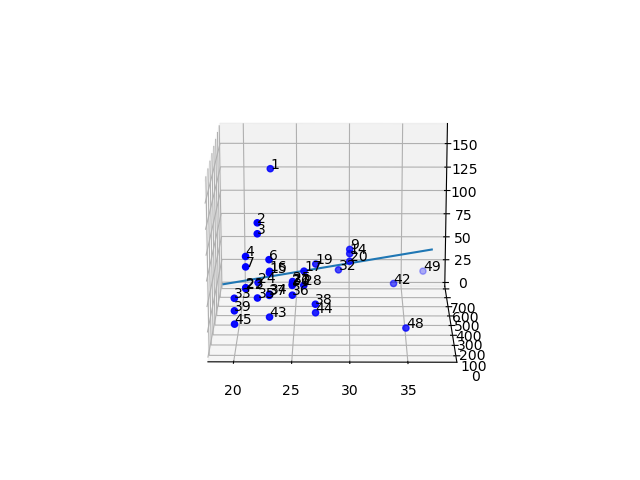

In [59]:
# Creamos o entorno
fig = plt.figure()  # Creamos unha figura (contenedor para elementos a debuxar)
ax = fig.add_subplot(111, projection='3d')  # Engadimos un Axes á figura (contén os elementos do debuxo)

x=delanteros_train["edad"]
x=delanteros_train["goles"]
x=delanteros_train["precio"]

# Debuxamos o scatter
ax.scatter(delanteros_train['edad'], delanteros_train['goles'], delanteros_train['precio'],c='b',marker='o')

# Creamos e mostramos a recta
line_x_vals = np.array(ax.get_xlim())
line_y_vals = np.array(ax.get_ylim())
line_z_vals = coef['Coefficients']['(Intercept)'] +coef['Coefficients']['edad']* line_x_vals+ coef['Coefficients']['goles'] * line_y_vals
ax.plot(line_x_vals, line_y_vals, line_z_vals)

# Imprimimos os identificadores
for i in delanteros_train.index:
    ax.text(delanteros_train['edad'][i], delanteros_train['goles'][i],delanteros_train['precio'][i], i)

plt.show()

Tras observar los valores mas atípicos de lso datos decidimos eliminar el 48, al considerarlo un valos atípico en varias posiciones. Obtenemos así una pequeña variación en los coeficientes.

In [60]:
# Eliminamos o outlier do conxunto
delanteros_train = delanteros_train.drop(48)

delanteros_X = pd.DataFrame(np.c_[delanteros_train['edad'], delanteros_train['goles']], columns = ['edad', 'goles'])
delanteros_Y = delanteros_train['precio']

model = LinearRegression()
model.fit(delanteros_X, delanteros_Y)

coef = pd.DataFrame([model.intercept_,model.coef_[0], model.coef_[1]], ['(Intercept)', delanteros_X.columns[0], delanteros.columns[1]], columns=['Coefficients'])
coef

,Coefficients
(Intercept),174.581979
edad,-5.126276
goles,0.127026


In [61]:
### Función de regresión lineal h ###
def h(x,y, th0, th1, th2):
    return (th0 + x * th1 + y * th2)

predicions = h(delanteros_test_X['edad'], delanteros_test_X['goles'], 
                th0=coef['Coefficients']['(Intercept)'], th1=coef['Coefficients']['edad'],
                th2=coef['Coefficients']['goles'])
#predicions2

In [62]:
e_cadratico = ecm(delanteros_test_Z, predicions)
print(e_cadratico)

504.28829097062334


In [63]:
np.sqrt(e_cadratico)

22.456364152966156

Cabe destacar la mejora, aunque pequeña al eliminar solamente un valor; de la predicción al bajar el error cuadrático y por lo tanto el error estimado.